In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
data = pd.read_csv('GOOG.csv')

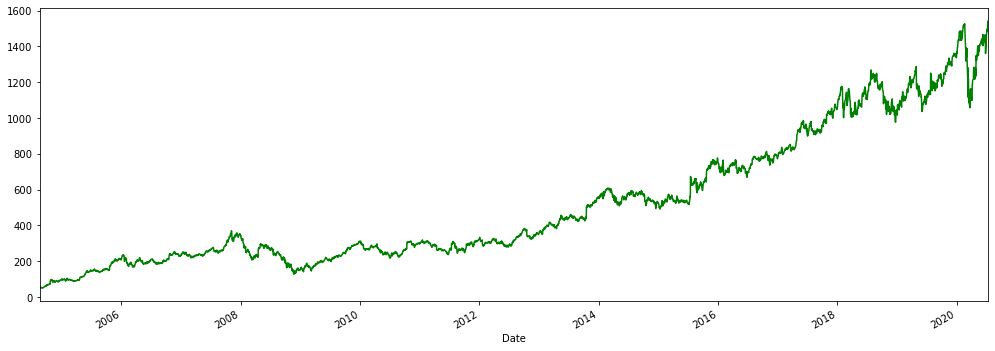

In [4]:
data1 = pd.read_csv('GOOG.csv',parse_dates=['Date'], index_col=['Date'])
plt.figure(figsize=(17,6))
data1['Close'].plot(color= 'green')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [6]:
data.shape

(4002, 7)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3997,2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
3998,2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700
3999,2020-07-09,1506.449951,1522.719971,1488.084961,1510.989990,1510.989990,1423300
4000,2020-07-10,1506.150024,1543.829956,1496.540039,1541.739990,1541.739990,1856300


In [8]:
training = data[data.Date <= '2018-06-01'].copy()
train =training.drop(['Date','Adj Close'], axis = 1)
train

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100
...,...,...,...,...,...
3466,1079.020020,1082.560059,1073.775024,1075.660034,899400
3467,1064.890015,1073.369995,1055.219971,1060.319946,1865100
3468,1063.030029,1069.209961,1056.829956,1067.800049,1138500
3469,1067.560059,1097.189941,1067.560059,1084.989990,3088300


In [9]:
testing = data[data.Date >= '2018-06-01'].copy()
test = testing.drop(['Date' ,'Adj Close'], axis =1)
test

,Open,High,Low,Close,Volume
3470,1099.349976,1120.000000,1098.500000,1119.500000,2421600
3471,1122.329956,1141.890015,1122.005005,1139.290039,1889600
3472,1140.989990,1145.738037,1133.189941,1139.660034,1678000
3473,1142.170044,1143.000000,1125.743042,1136.880005,1698200
3474,1131.319946,1135.819946,1116.520020,1123.859985,1520000
...,...,...,...,...,...
3997,1490.000000,1516.800049,1483.550049,1485.180054,1458200
3998,1494.319946,1505.880005,1485.630005,1496.000000,1249700
3999,1506.449951,1522.719971,1488.084961,1510.989990,1423300
4000,1506.150024,1543.829956,1496.540039,1541.739990,1856300


In [10]:
scale = MinMaxScaler()
Train  = scale.fit_transform(train)

In [11]:
X_train = []
Y_train = []

In [12]:
for i in range(60,Train.shape[0]):
    X_train.append(Train[i-60:i,:])
    Y_train.append(Train[i,0])

In [13]:
X_train,Y_train = np.array(X_train), np.array(Y_train)

In [14]:
R_LSTM = keras.models.Sequential()
R_LSTM.add(keras.layers.LSTM(units= 300, return_sequences=True, input_shape=(X_train.shape[1], 5) ))
R_LSTM.add(keras.layers.LSTM(units=100, return_sequences=True))
R_LSTM.add(keras.layers.LSTM(units=50, return_sequences=False, activation = 'relu'))
R_LSTM.add(keras.layers.Dense(30))
R_LSTM.add(keras.layers.Dense(10))
R_LSTM.add(keras.layers.Dense(1))

In [15]:
R_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 300)           367200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 100)           160400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 30)                1530      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 559,651
Trainable params: 559,651
Non-trainable params: 0
__________________________________________________

In [16]:
R_LSTM.compile(optimizer = 'adam', loss = 'mae')

In [17]:
Lstm_run = R_LSTM.fit(X_train, Y_train, epochs = 10, validation_split = 0.2, batch_size = 32)

Train on 2728 samples, validate on 683 samples
Epoch 1/10
2728/2728 [==============================] - 868s 318ms/sample - loss: 0.0265 - val_loss: 0.0603
Epoch 2/10
2728/2728 [==============================] - 730s 268ms/sample - loss: 0.0110 - val_loss: 0.0333
Epoch 3/10
2728/2728 [==============================] - 773s 283ms/sample - loss: 0.0115 - val_loss: 0.0202
Epoch 4/10
2728/2728 [==============================] - 939s 344ms/sample - loss: 0.0103 - val_loss: 0.0229
Epoch 5/10
2728/2728 [==============================] - 492s 180ms/sample - loss: 0.0090 - val_loss: 0.0305
Epoch 6/10
2728/2728 [==============================] - 364s 133ms/sample - loss: 0.0079 - val_loss: 0.0459
Epoch 7/10
2728/2728 [==============================] - 341s 125ms/sample - loss: 0.0093 - val_loss: 0.0160
Epoch 8/10
2728/2728 [==============================] - 340s 125ms/sample - loss: 0.0087 - val_loss: 0.0151
Epoch 9/10
2728/2728 [==============================] - 337s 124ms/sample - loss: 0.0070 

In [18]:
R_LSTM.save('LSTMmodel.h5')

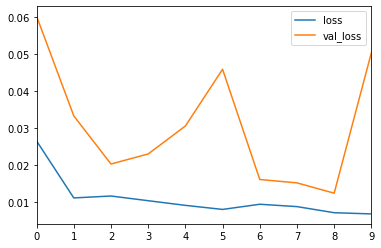

In [20]:
pd.DataFrame(Lstm_run.history).plot()

# Test

In [21]:
past_60 = train.tail(60)

In [22]:
df = past_60.append(test,ignore_index=True)

In [23]:
df.shape

(592, 5)

In [24]:
Test = scale.transform(df)

In [25]:
X_test = []
Y_test = []

In [26]:
for i in range(60, Test.shape[0]):
    X_test.append(Test[i-60:i,:])
    Y_test.append(Test[i,0])

In [27]:
X_test, Y_test =np.array(X_test), np.array(Y_test)

In [28]:
y_pred = R_LSTM.predict(X_test)

In [29]:
y_pred

array([[0.8409477 ],
       [0.84857154],
       [0.85934436],
       [0.8712693 ],
       [0.8811201 ],
       [0.8860546 ],
       [0.88555723],
       [0.8823781 ],
       [0.87973356],
       [0.8790952 ],
       [0.8814233 ],
       [0.88568825],
       [0.8914212 ],
       [0.8974943 ],
       [0.9039668 ],
       [0.9083731 ],
       [0.90917695],
       [0.9042218 ],
       [0.8952787 ],
       [0.8845713 ],
       [0.8743728 ],
       [0.86809516],
       [0.865237  ],
       [0.8658217 ],
       [0.86834097],
       [0.8729575 ],
       [0.88030046],
       [0.8887432 ],
       [0.8956462 ],
       [0.90225667],
       [0.9096345 ],
       [0.91629875],
       [0.9211719 ],
       [0.9251727 ],
       [0.9272642 ],
       [0.9274503 ],
       [0.92706287],
       [0.93394595],
       [0.94556785],
       [0.9590047 ],
       [0.9697406 ],
       [0.97221553],
       [0.9673797 ],
       [0.95955503],
       [0.9514004 ],
       [0.94628525],
       [0.94457334],
       [0.947

In [30]:
scale.scale_

array([8.86587579e-04, 8.80119010e-04, 8.89537936e-04, 8.88082354e-04,
       1.21162775e-08])

In [31]:
scaler = 1/8.86587579e-04

In [32]:
y_pred = y_pred*scaler
y_test = Y_test*scaler

In [33]:
y_pred

array([[ 948.52185],
       [ 957.121  ],
       [ 969.27185],
       [ 982.72217],
       [ 993.8331 ],
       [ 999.3988 ],
       [ 998.8379 ],
       [ 995.2521 ],
       [ 992.2692 ],
       [ 991.5492 ],
       [ 994.1751 ],
       [ 998.98566],
       [1005.45197],
       [1012.30194],
       [1019.60236],
       [1024.5724 ],
       [1025.479  ],
       [1019.88995],
       [1009.8029 ],
       [ 997.7258 ],
       [ 986.2227 ],
       [ 979.142  ],
       [ 975.9183 ],
       [ 976.57776],
       [ 979.4193 ],
       [ 984.6264 ],
       [ 992.9086 ],
       [1002.4314 ],
       [1010.2174 ],
       [1017.67346],
       [1025.9951 ],
       [1033.5118 ],
       [1039.0084 ],
       [1043.5209 ],
       [1045.88   ],
       [1046.0898 ],
       [1045.653  ],
       [1053.4165 ],
       [1066.525  ],
       [1081.6808 ],
       [1093.79   ],
       [1096.5815 ],
       [1091.1271 ],
       [1082.3015 ],
       [1073.1036 ],
       [1067.3342 ],
       [1065.4033 ],
       [1069.

# Plotting

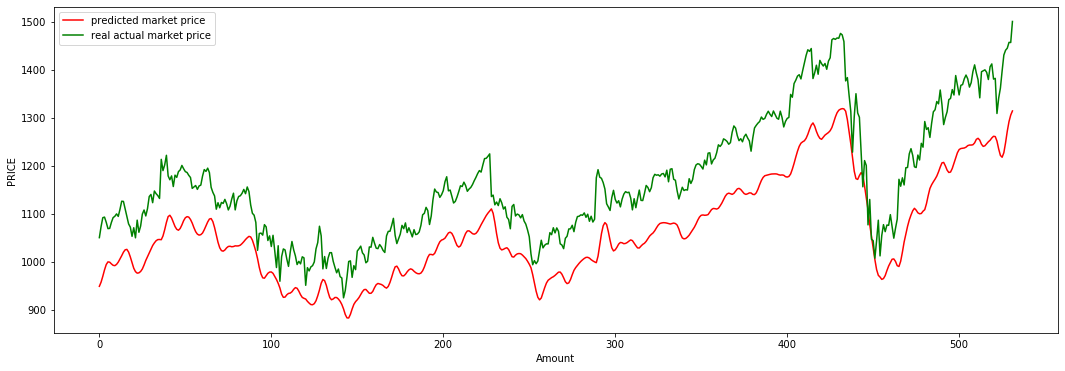

In [36]:
plt.figure(figsize=(18,6))
plt.plot(y_pred, color = 'red', label = 'predicted market price')
plt.plot(y_test, color = 'green', label = 'real actual market price')
plt.ylabel('PRICE')
plt.xlabel('Amount')
plt.legend()
plt.show()